In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/Eyes_GH/first_Mod6'

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/Eyes_GH/first_Mod6'

In [6]:
import tensorflow_datasets as tfds
import tensorflow as tf
from flask import Flask, jsonify, make_response, request
import threading
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os
import base64
from PIL import Image
from io import StringIO

In [7]:
app = Flask(__name__)
# padding_size = 1000
# model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/sentiment_analysis.hdf5')
# text_encoder = tfds.features.text.TokenTextEncoder.load_from_file("/content/drive/My Drive/Colab Notebooks/models/sa_encoder.vocab")

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Eyes_GH/first_Mod6.h5')
# LINK DOWNLOAD MODEL https://drive.google.com/file/d/1-r6IRlBZiWeTe7aLpd0H9TFI4TXkDq1h/view?usp=sharing

# Show the model architecture
# new_model.summary()

# label
label=list(['bulk eyes','cataract','crossed eyes','normal'])

# print('Model and Label loaded.......')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

@app.route("/")
def hello():
    return "I am alive!"

# def readb64(base64_string):
#     sbuf = StringIO()
#     sbuf.write(base64.b64decode(base64_string))
#     pimg = Image.open(sbuf)
#     return cv2.cvtColor(np.array(pimg), cv2.COLOR_RGB2BGR)


def preprocessing(image):
  # image = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  
  image = cv2.resize(image,(332,151))
  image = np.array(image).astype(np.float32)/255.0
  image = np.expand_dims(image,axis=2)
  image = np.expand_dims(image, axis=0)
  return image

#@app.route('/predicteyes', methods=['POST'])
def eyedisease_detection(img):
  img=cv2.imread(img) # FOR IMAGES
  # img = readb64(img) # FOR JSON READB64 IMAGES
  if (img is None):
    return #"Can't open image file"
  else:  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.1, 3, minSize=(100, 100))
    if (faces is None):
        return #'No Face Detected'
    else:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
            # return imshow(img)
            facecnt = len(faces)
            if (facecnt==0):
              return #'No Face Detected'
            else:
              # print("Detected faces: %d" % facecnt)
              height, width = img.shape[:2]

              for (x, y, w, h) in faces:
                  r = max(w, h) / 2
                  centerx = x + w / 2
                  centery = y + h / 2
                  nx = int(centerx - r)
                  ny = int(centery - r)
                  nr = int(r * 2)
                  faceimg = np.array(img[ny:ny+nr, nx:nx+nr])
                  return (predict(preprocessing(faceimg)))

def predict(np_image):
  if (np_image is None):
    return label[3]
  else:
    predictions = new_model.predict_classes(np_image)
    return label[predictions[0].astype(int)]

@app.route('/predicteyes', methods=['POST'])
def predict_eyes():
    image = request.get_json()['text']
    predictions =3 # 
    predictions = eyedisease_detection(image)
    # predictions = predict(image)
    return jsonify({'predictions ':predictions})


# threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':6000}).start()

# Bulk Eyes

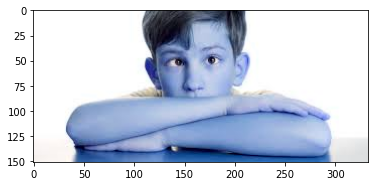

In [10]:
plt.imshow(cv2.imread('/content/images-56.jpeg'))

In [9]:
eyedisease_detection('/content/images-64.jpeg')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'bulk eyes'

# Cataract

In [11]:
image_test = preprocessing(cv2.imread('/content/image-20.jpeg',cv2.IMREAD_GRAYSCALE))
predict(image_test)

'cataract'

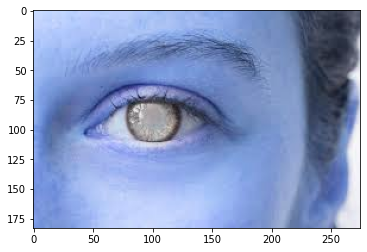

In [14]:
plt.imshow(cv2.imread('/content/image-20.jpeg'))

# Crossed Eyes

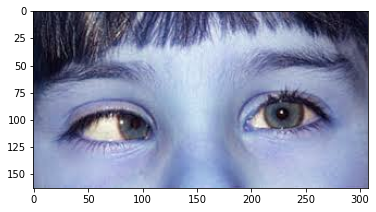

In [16]:
plt.imshow(cv2.imread('/content/image-5.jpeg'))

In [17]:
image_test2 = preprocessing(cv2.imread('/content/image-5.jpeg',cv2.IMREAD_GRAYSCALE))
predict(image_test2)

'bulk eyes'

# Normal Eyes

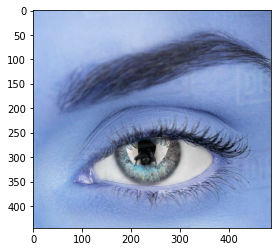

In [18]:
plt.imshow(cv2.imread('/content/forward_look (48).jpg'))

In [19]:
image_test3 = preprocessing(cv2.imread('/content/forward_look (48).jpg',cv2.IMREAD_GRAYSCALE))
predict(image_test3)

'normal'